## Spike Challenge Precio
### Franco Betteo

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

import utils

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
%load_ext autoreload
%autoreload 2

### 1. Datos

In [5]:
precipitaciones = pd.read_csv("precipitaciones.csv")
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [6]:
banco_central = pd.read_csv("banco_central.csv")
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.

### 2. Análisis de datos. Creación de variables

#### Precipitaciones

In [7]:
precipitaciones['date'] = pd.to_datetime(precipitaciones.date)
precipitaciones['anio'] = precipitaciones.date.dt.year
precipitaciones['mes'] = precipitaciones.date.dt.month
precipitaciones.drop_duplicates(inplace=True)
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,anio,mes
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789,1999.169355,6.467742
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615,11.945142,3.461617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127,1979.000000,1.000000
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643,1989.000000,3.000000
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940,1999.000000,6.000000
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590,2009.250000,9.000000
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673,2020.000000,12.000000


In [8]:
precipitaciones_long = pd.melt(precipitaciones.drop(columns=['anio', 'mes']), id_vars="date", var_name="region", value_name="precipitaciones")

In [9]:
descripcion_precipitaciones = precipitaciones_long.groupby("region").agg({'date': ['min', 'max', 'count'],
                                                           'precipitaciones': ['min', 'max', 'mean', 'median', utils.count_na]
                                                            })
descripcion_precipitaciones.columns = ["_".join(pair) for pair in descripcion_precipitaciones.columns]
descripcion_precipitaciones.reset_index()                                                    

,region,date_min,date_max,date_count,precipitaciones_min,precipitaciones_max,precipitaciones_mean,precipitaciones_median,precipitaciones_count_na
0,Biobio,1979-01-01,2020-04-01,496,0.001170,702.434707,128.113406,79.558557,0
1,Coquimbo,1979-01-01,2020-04-01,496,0.000000,347.133889,16.154691,4.071036,0
2,La_Araucania,1979-01-01,2020-04-01,496,0.005331,661.211203,151.486456,110.570990,0
3,Libertador_Gral__Bernardo_O_Higgins,1979-01-01,2020-04-01,496,0.000000,645.515752,72.249805,25.995969,0
4,Los_Rios,1979-01-01,2020-04-01,496,0.748127,717.735673,199.451789,159.467940,0
5,Maule,1979-01-01,2020-04-01,496,0.000000,759.177712,98.662773,45.649888,0
6,Metropolitana_de_Santiago,1979-01-01,2020-04-01,496,0.000000,524.592667,49.666682,19.087592,0
7,Valparaiso,1979-01-01,2020-04-01,496,0.000000,441.048604,32.450980,9.037825,0


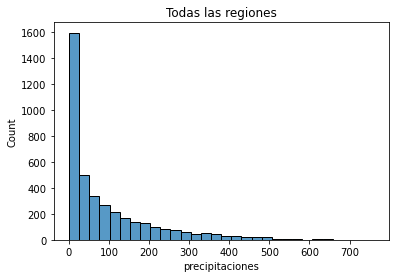

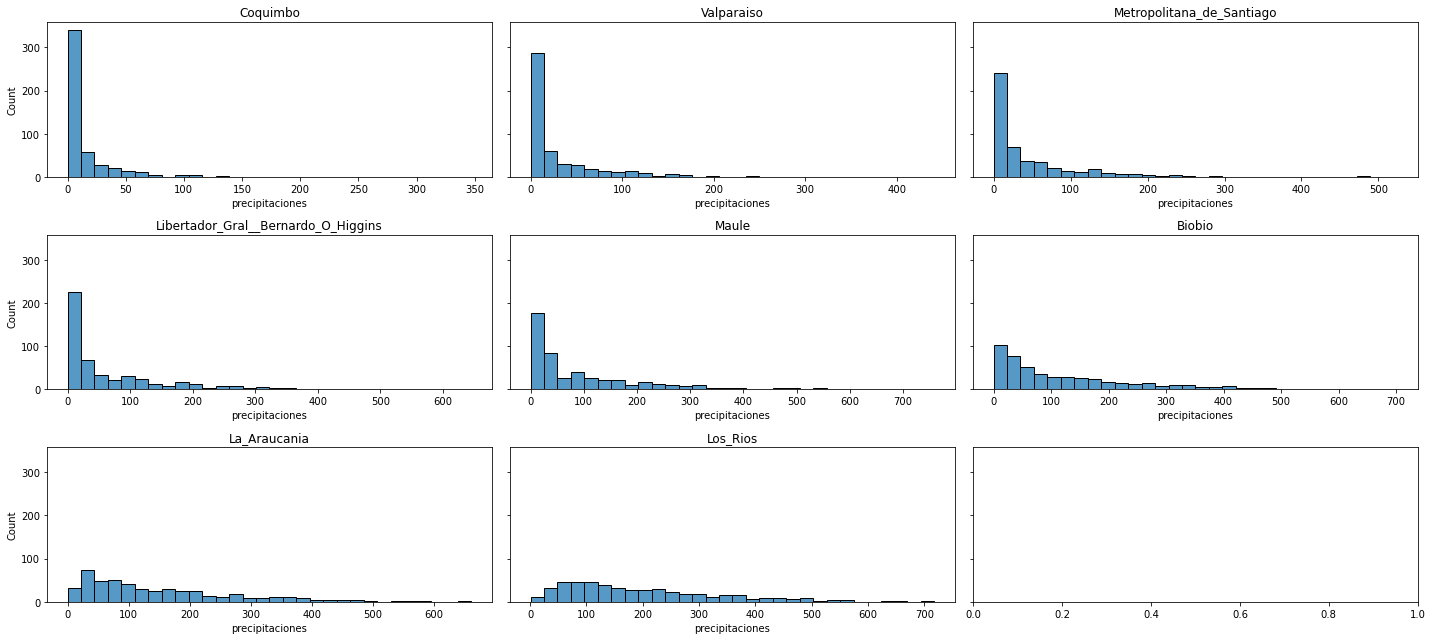

In [10]:
utils.plot_hist_precipitaciones(precipitaciones_long)
plt.title("Todas las regiones")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_hist_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

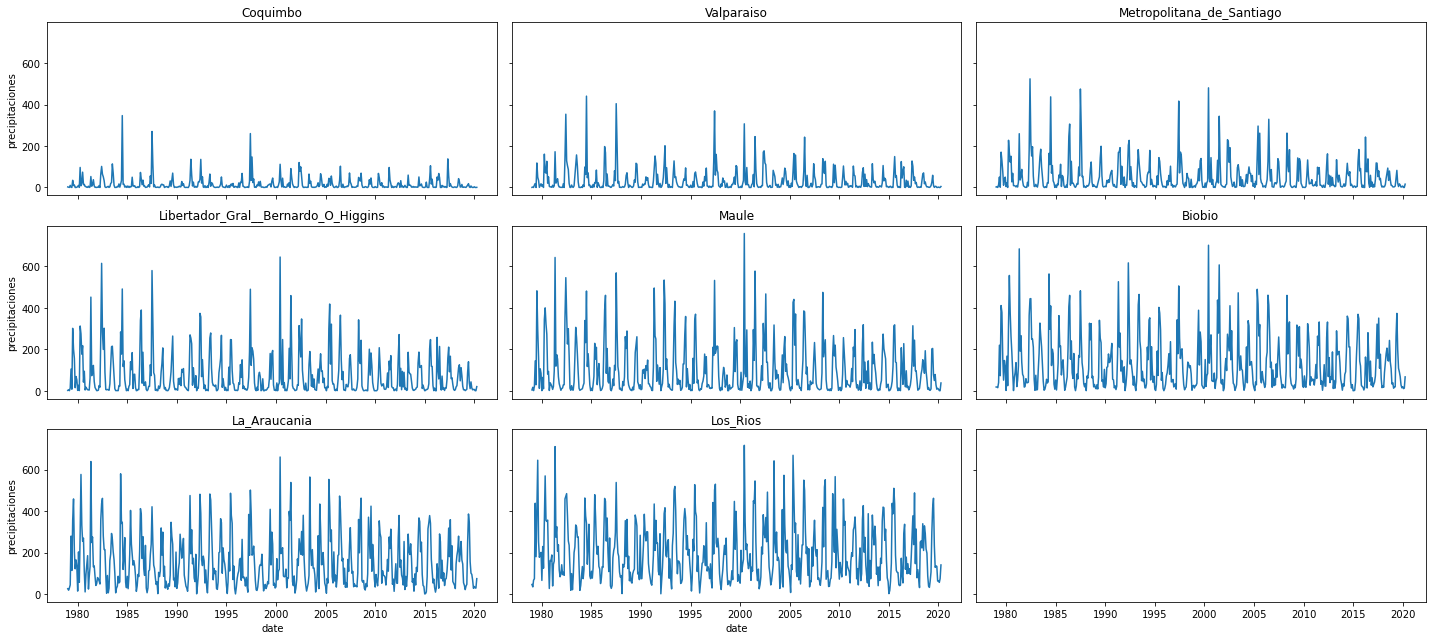

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharex=True, sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_simple_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

Por un lado vemos que todas las regiones presentan estacionalidad con picos marcados. La diferencia principal radica en la escala donde vemos que Coquimbo y Valparaíso tiene claramente una cantidad de precipitaciones anuales menores que el resto, con varios registros con valores cercanos a 0. 
La región Los Ríos por otro lado casi no tiene meses secos.  
El dataset no presenta NaN

#### Banco Central

In [12]:
banco_central_clean = banco_central.copy(deep=True)
banco_central_clean.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.

In [13]:
print(f'Una primera inspección nos muestra que el dataframe tiene {banco_central_clean.shape[0]} filas y {banco_central_clean.shape[1]} columnas.\n\
Vemos que las cifras tienen separaciones de a miles por puntos y eso genera que pandas lo lea como Strings. Removemos los puntos e intentamos convertir a float, lo cual devuelve un error por encontrar caracteres "a" entre los valores. Cambiamos todos los caracteres por NaN y ahora si podemos convertir a Float, que a su vez transforma las celdas vacías en NaN.\n\
Al querer crear las variables de año y mes que luego nos van a servir para cruzar con el archivo que contiene el precio de la leche nos encontramos con que existe un mes "13". Luego de una inspección vemos que corresponde al 12 de ese año y es el único valor fuera del rango esperado.')


Una primera inspección nos muestra que el dataframe tiene 614 filas y 85 columnas.
Vemos que las cifras tienen separaciones de a miles por puntos y eso genera que pandas lo lea como Strings. Removemos los puntos e intentamos convertir a float, lo cual devuelve un error por encontrar caracteres "a" entre los valores. Cambiamos todos los caracteres por NaN y ahora si podemos convertir a Float, que a su vez transforma las celdas vacías en NaN.
Al querer crear las variables de año y mes que luego nos van a servir para cruzar con el archivo que contiene el precio de la leche nos encontramos con que existe un mes "13". Luego de una inspección vemos que corresponde al 12 de ese año y es el único valor fuera del rango esperado.


In [14]:


# remover separador de miles con punto (excepto Periodo)
banco_central_clean = banco_central.apply(lambda x: x.astype('str').str.replace("\.","", regex=True) if x.name in banco_central.columns[1:] else x)
# reemplazar caracteres por Nan  (excepto Periodo)
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('str').str.replace("[a-zA-Z]+","NaN", regex=True) if x.name in banco_central.columns[1:] else x)
# convierto a numerico, Nan en los vacíos
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('float') if x.name in banco_central.columns[1:] else x)
# fix de mes 13 en 2020, deberia ser 12
banco_central_clean['Periodo'] = np.where(banco_central_clean['Periodo']=="2020-13-01 00:00:00 UTC", "2020-12-01 00:00:00 UTC", banco_central_clean['Periodo'])
banco_central_clean['Periodo'] = pd.to_datetime(banco_central_clean.Periodo).dt.date
banco_central_clean['anio'] = pd.to_datetime(banco_central_clean.Periodo).dt.year
banco_central_clean['mes'] = pd.to_datetime(banco_central_clean.Periodo).dt.month
banco_central_clean.sort_values('Periodo', inplace=True)

banco_central_clean.drop_duplicates(inplace=True)

In [15]:
resumen = banco_central_clean.apply(['min', 'max', 'mean', lambda x: x.isna().sum()/len(x)], 0).reset_index()
resumen['index'][3] = "proporcion_NA" 
resumen

,index,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,anio,mes
0,min,1970-01-01,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,1.039671e+07,1.271215e+06,1.035881e+07,1.292978e+06,1.358560e+05,3.005438e+06,1.739666e+06,2.477710e+07,6.407887e+06,1.008940e+05,9.841677e+06,1.690736e+06,6.502213e+06,1.995621e+07,2.808115e+06,1.072958e+07,1.118740e+05,2.525630e+05,6.350730e+05,4.420184e+06,5.691837e+06,1.139389e+07,8.045511e+07,1.157557e+07,5.196854e+06,1.158010e+05,9.452492e+06,5.852693e+06,1.108406e+07,9.900000e+01,401.000000,15.000000,1.000000e+00,1334.000000,26.000000,186.000000,4.346090e+05,113.000000,450.000000,4.701000e+03,8.156196e+06,6.251775e+07,2.630406e+06,7.456535e+07,3.516149e+07,2.165196e+06,2.933080e+05,6.865296e+06,1.656582e+06,1.453648e+07,5.036122e+07,3.304888e+06,6.859292e+07,1.561431e+06,3.966499e+07,4.672877e+06,7.420130e+05,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,0.000000e+00,2.616955e+07,1.205000e+03,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,46580.000000,1970.0,1.0
1,max,2020-12-01,9.998748e+08,9.992

In [16]:
print(f'Vemos que la mayoría de las columnas tienen una gran proporción de datos faltantes (mas del 50%) salvo algunas excepciones como "Precio de la gasolina" o\
    "Precio de la onza de oro". Se ve en los plots posteriores que esto se debe a que muchas series solo tienen valores a partir de determinada fecha (que varía tipo de variable).\n\
Las escalas de algunas variables son llamativas y probablemente los puntos separadores que venían en la data inicial no indicaban nada en esos casos. Por ejemplo para las\
    variables Índice vemos valores de cientos de miles y hasta millones cuando son variables que toman base 100 en algún período y se actualizan con las variaciones porcentuales.\
    Valores tan elevados corresponden a crecimientos inmensos respecto a la base.\n\
Se ve más claro en los gráficos más adelante pero el rango de muchas variables es llamativo con grandes picos y comportamientos extraños que podría deberse a outliers o escalas mezcladas dentro de una misma serie.')



Vemos que la mayoría de las columnas tienen una gran proporción de datos faltantes (mas del 50%) salvo algunas excepciones como "Precio de la gasolina" o    "Precio de la onza de oro". Se ve en los plots posteriores que esto se debe a que muchas series solo tienen valores a partir de determinada fecha (que varía tipo de variable).
Las escalas de algunas variables son llamativas y probablemente los puntos separadores que venían en la data inicial no indicaban nada en esos casos. Por ejemplo para las    variables Índice vemos valores de cientos de miles y hasta millones cuando son variables que toman base 100 en algún período y se actualizan con las variaciones porcentuales.    Valores tan elevados corresponden a crecimientos inmensos respecto a la base.
Se ve más claro en los gráficos más adelante pero el rango de muchas variables es llamativo con grandes picos y comportamientos extraños que podría deberse a outliers o escalas mezcladas dentro de una misma serie.


In [17]:
# Grupos de variables
set([x[0]  for x in banco_central_clean.columns.str.split("_")])

{'Derechos',
 'Generacion',
 'Imacec',
 'Impuesto',
 'Indice',
 'No',
 'Ocupacion',
 'Ocupados',
 'PIB',
 'Periodo',
 'Precio',
 'Tipo',
 'Ventas',
 'anio',
 'mes'}

### Series  de tiempo para visualizar variables de distintos grupos

#### Imacec

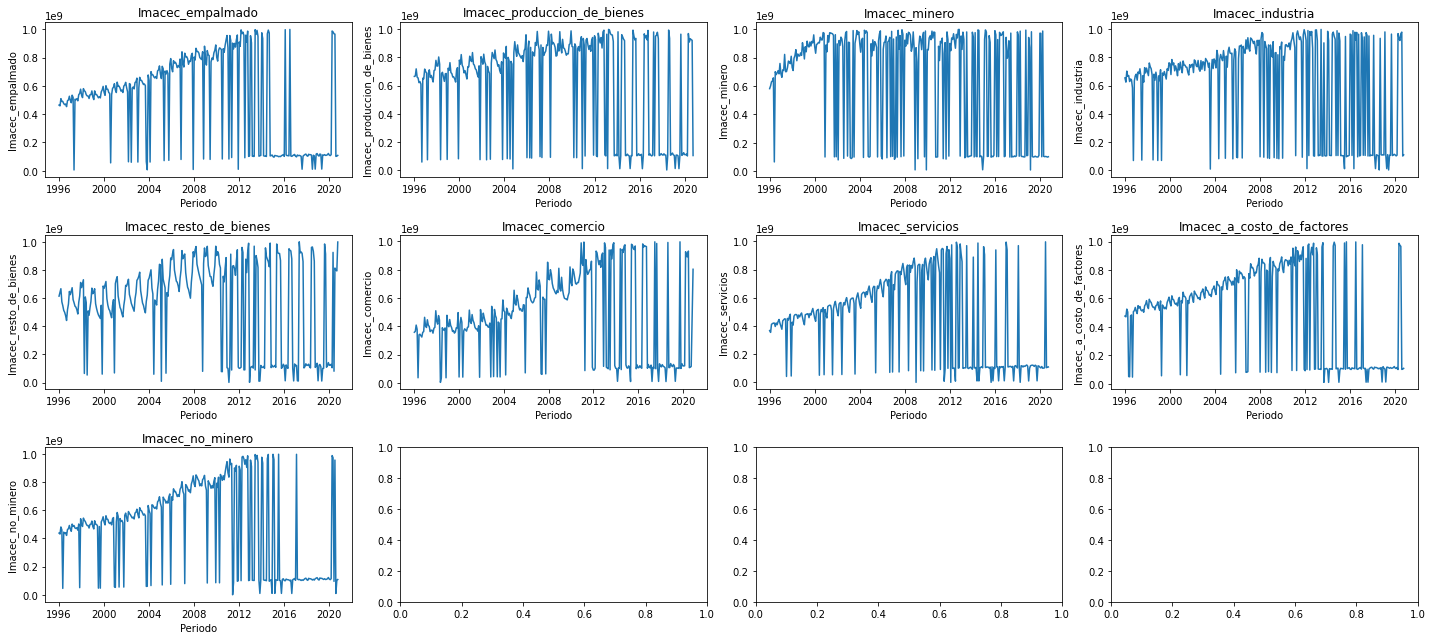

In [18]:

indice = banco_central_clean.columns.str.startswith("Imacec")
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,9))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

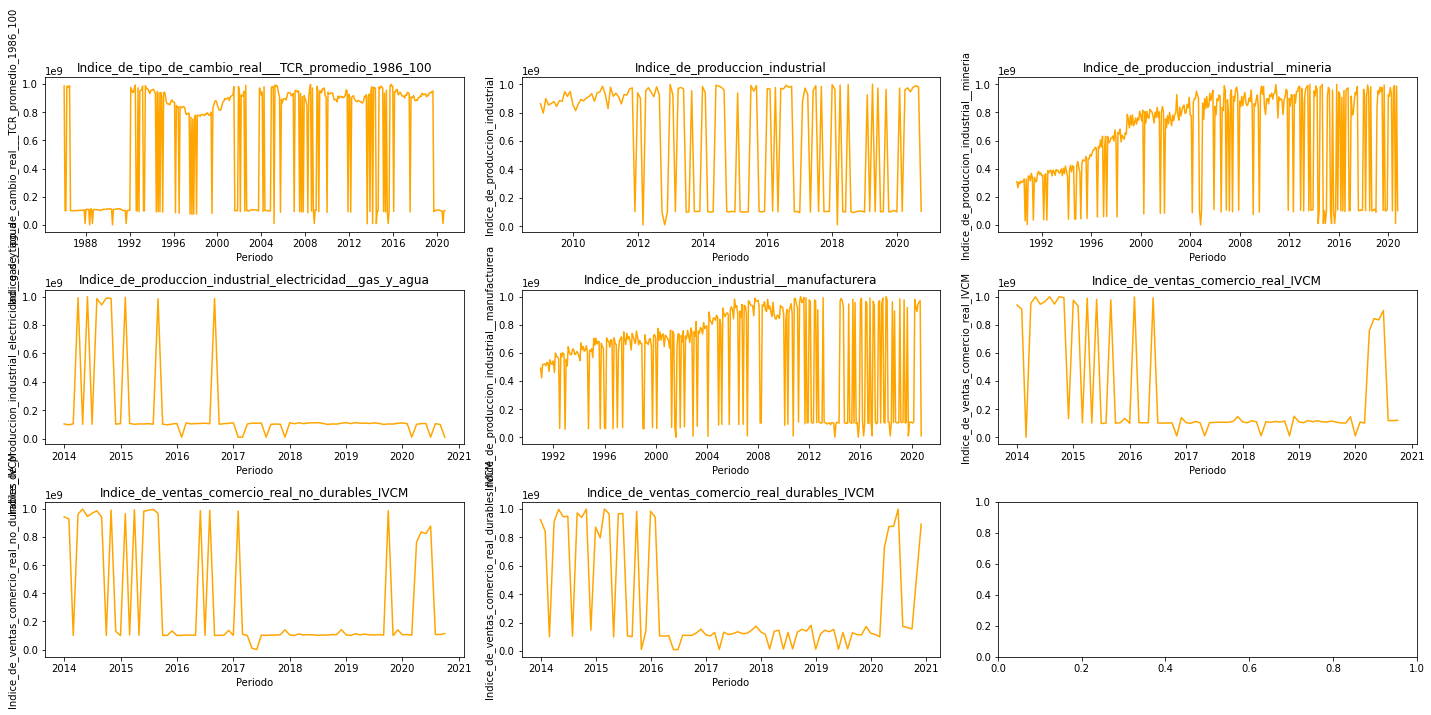

In [19]:
indice = banco_central_clean.columns.str.startswith("Indice")
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="orange")
    ax[i].set_title(col)

plt.tight_layout()

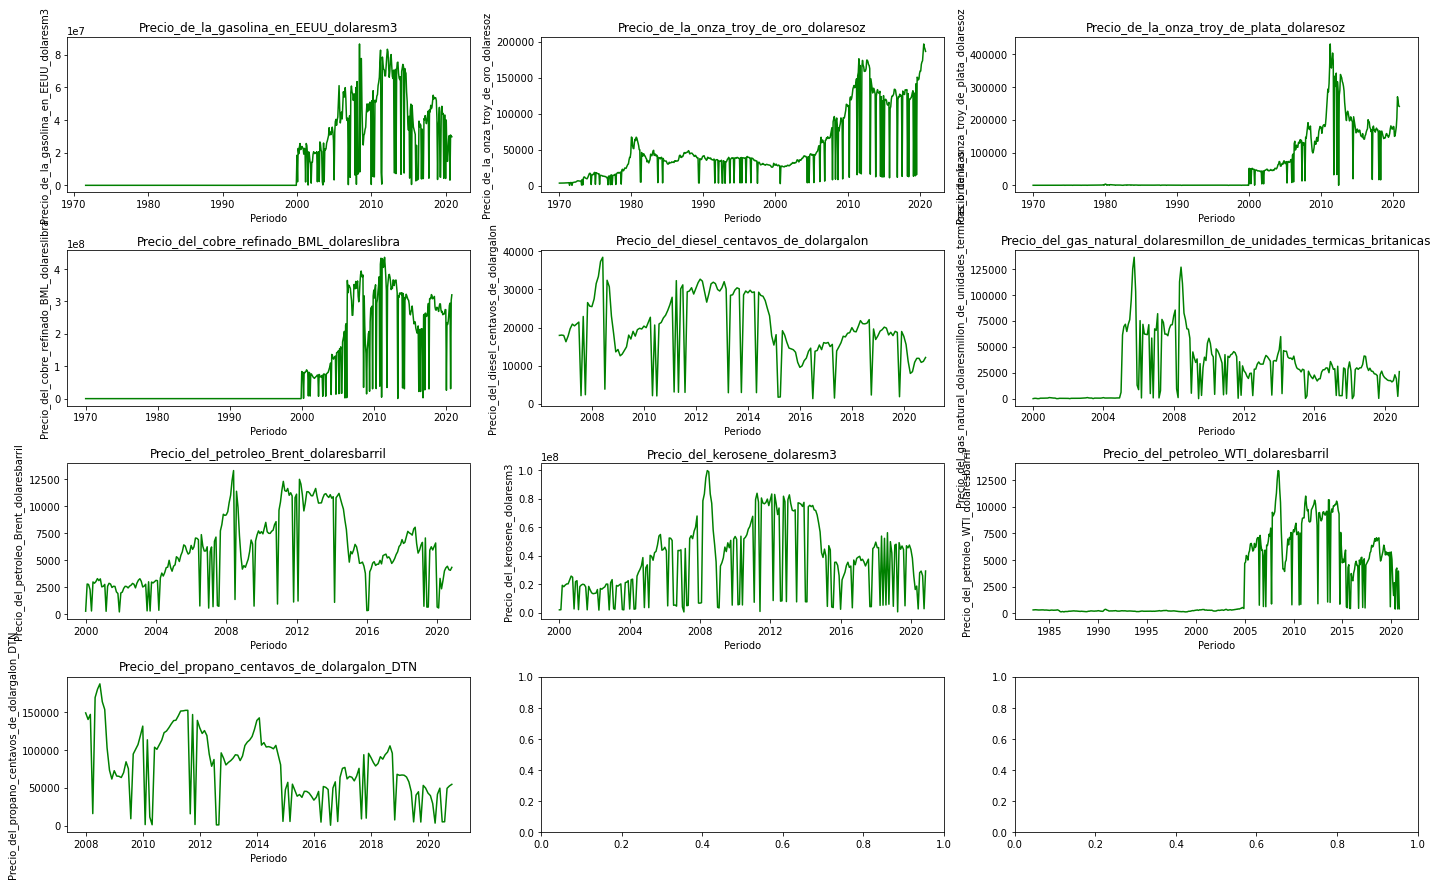

In [20]:
indice = banco_central_clean.columns.str.startswith("Precio")
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,12))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="green")
    ax[i].set_title(col)

plt.tight_layout()

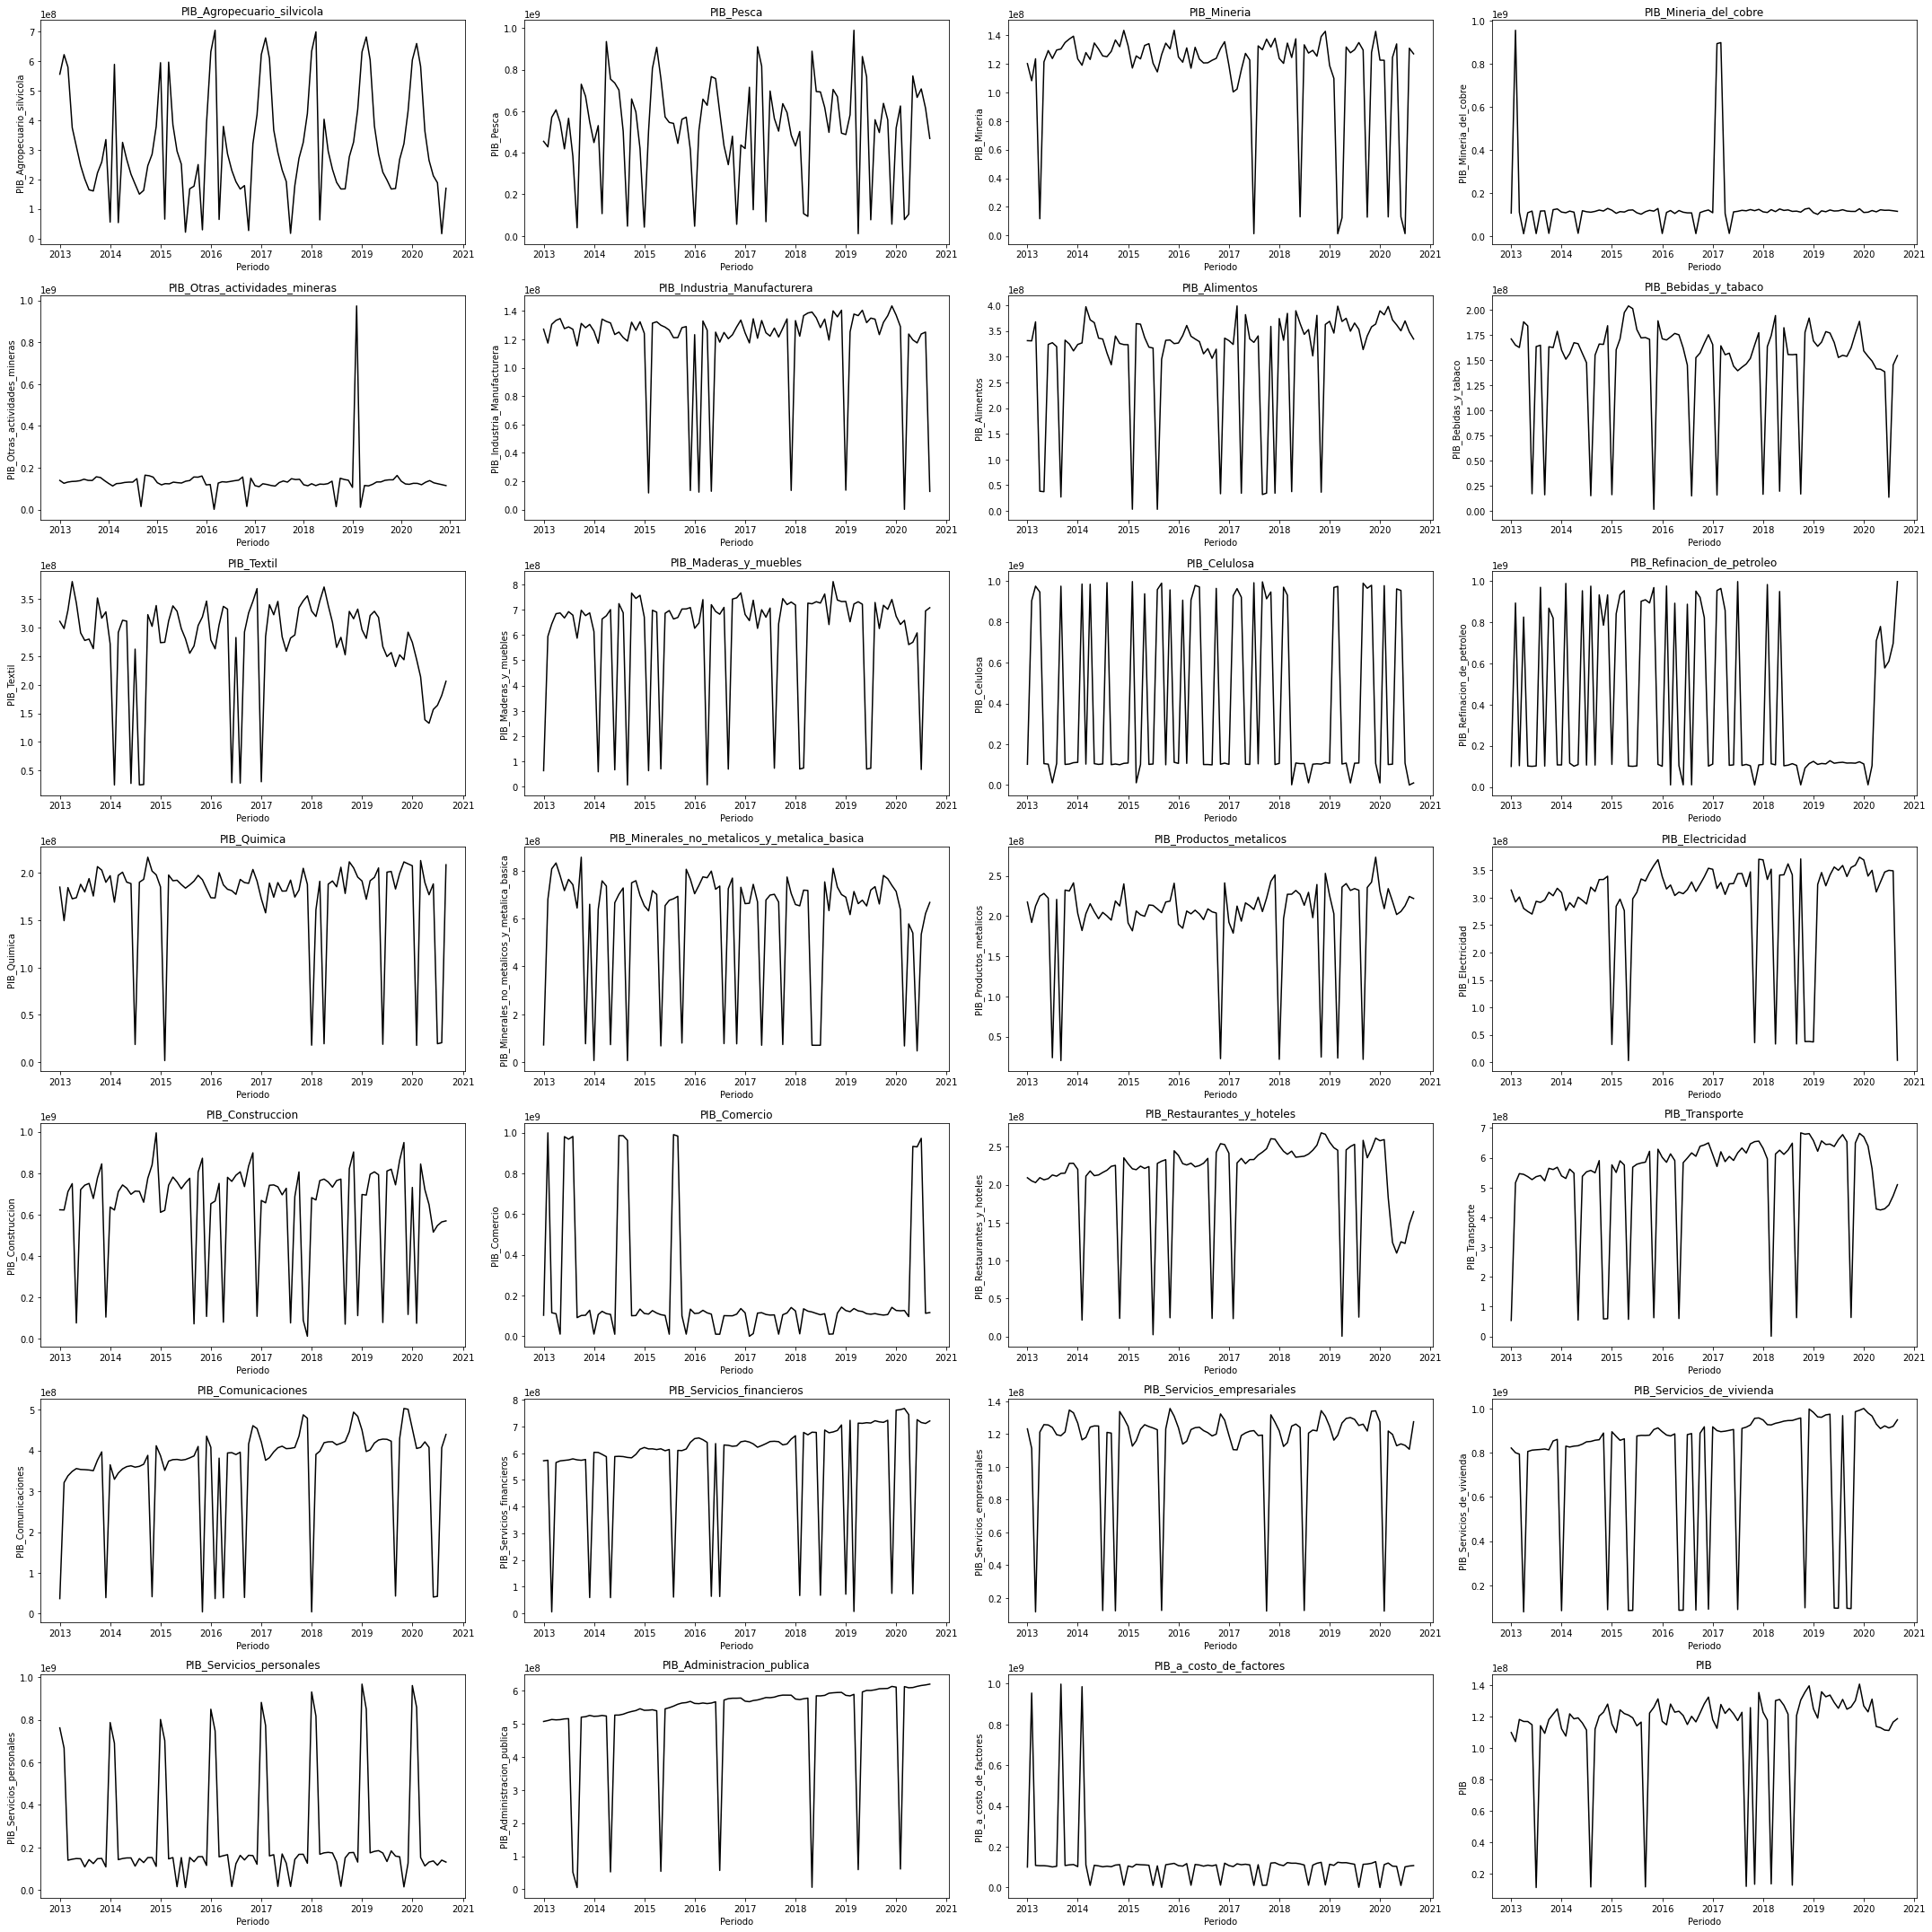

In [21]:
indice = banco_central_clean.columns.str.startswith("PIB")
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(30,30))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="black")
    ax[i].set_title(col)

plt.tight_layout()

In [22]:
# Generamos una version donde se rellenan NA con el primer valor válido anterior. No resuelve outliers pero si algunas suciedades del datasets. 
filled_banco_central = banco_central_clean.fillna(method="ffill")

In [23]:
filled_banco_central.query('anio >= 2013').apply(['min', 'max', 'mean', lambda x: x.isna().sum()/len(x)], 0).reset_index()


,index,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,anio,mes
0,min,2013-01-01,1.057236e+07,1.014872e+06,1.010200e+07,1.032193e+06,9.634026e+06,1.012540e+07,1.055541e+06,9.371354e+06,1.009233e+07,1.586778e+07,1.039671e+07,1.271215e+06,1.035881e+07,1.292978e+06,1.358560e+05,3.005438e+06,1.739666e+06,2.477710e+07,6.407887e+06,1.008940e+05,9.841677e+06,1.690736e+06,6.502213e+06,1.995621e+07,2.808115e+06,1.072958e+07,1.118740e+05,2.525630e+05,6.350730e+05,4.420184e+06,5.691837e+06,1.139389e+07,8.045511e+07,1.157557e+07,5.196854e+06,1.158010e+05,9452492.0,5.852693e+06,1.108406e+07,5.138690e+05,10850.000000,16634.000000,3.279130e+05,1334.000000,27.000000,308.000000,4.953750e+05,383.000000,450.0000,5.045700e+04,8.156196e+06,6.251775e+07,2.630406e+06,7.456535e+07,3.516149e+07,2.165196e+06,2.933080e+05,6.865296e+06,1.656582e+06,1.453648e+07,5.036122e+07,3.304888e+06,6.859292e+07,1.561431e+06,3.966499e+07,4.672877e+06,7.420130e+05,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,0.000000e+00,2.616955e+07,1.024400e+04,9.091755e+06,1.060978e+07,1.005490e+07,1.023349e+07,1.002002e+06,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,86810.0000,2013.0,1.0
1,max,2020-12-01,9.998748e+08,9.99272

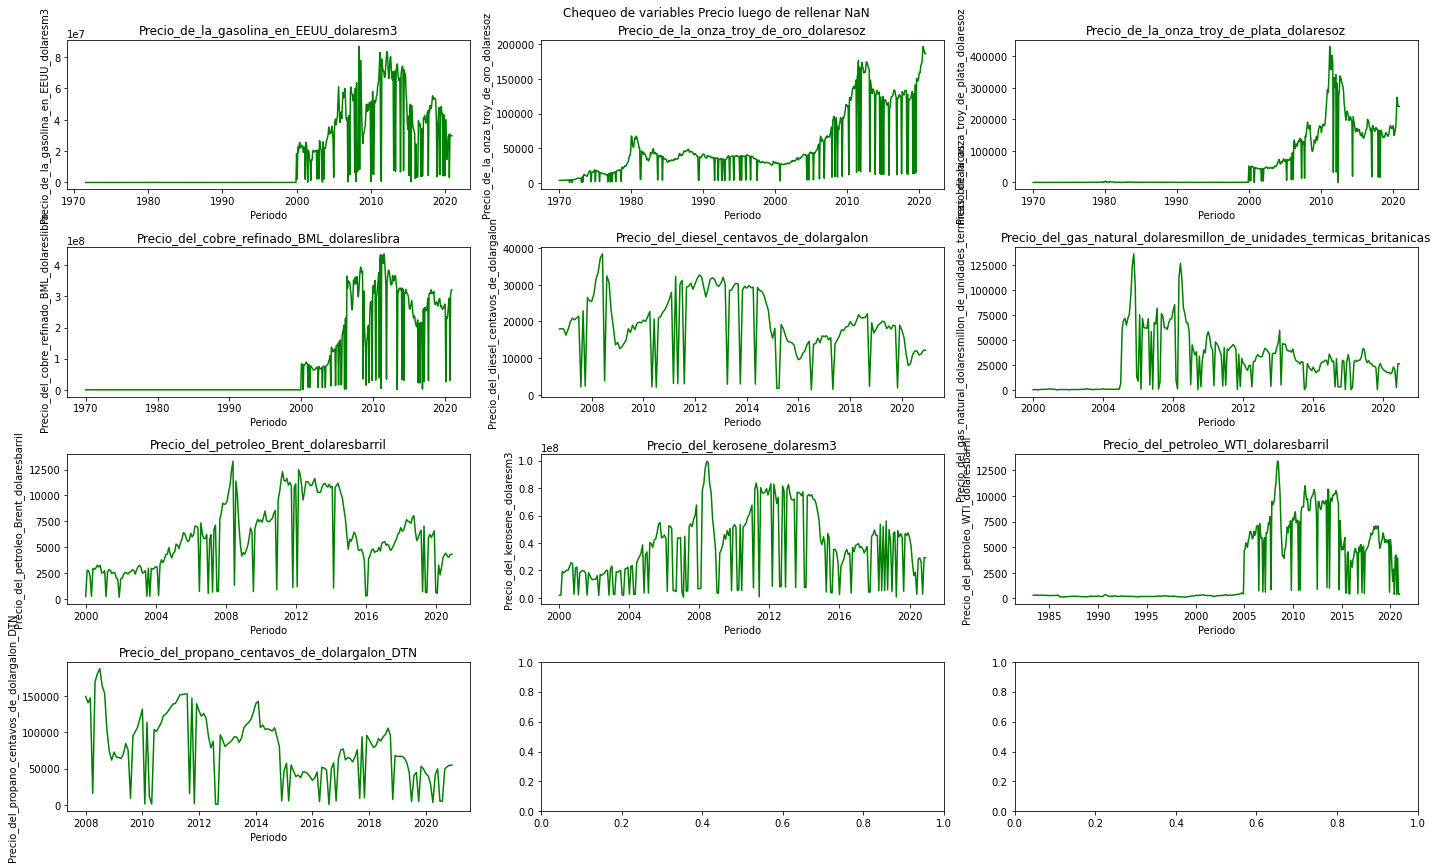

In [24]:

indice = filled_banco_central.columns.str.startswith("Precio")
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,12))
ax = ax.flatten()

for i,col in  enumerate(filled_banco_central.columns[indice]):
    temp = filled_banco_central.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="green")
    ax[i].set_title(col)
plt.suptitle("Chequeo de variables Precio luego de rellenar NaN")
plt.tight_layout()

### 3. Visualizaciones

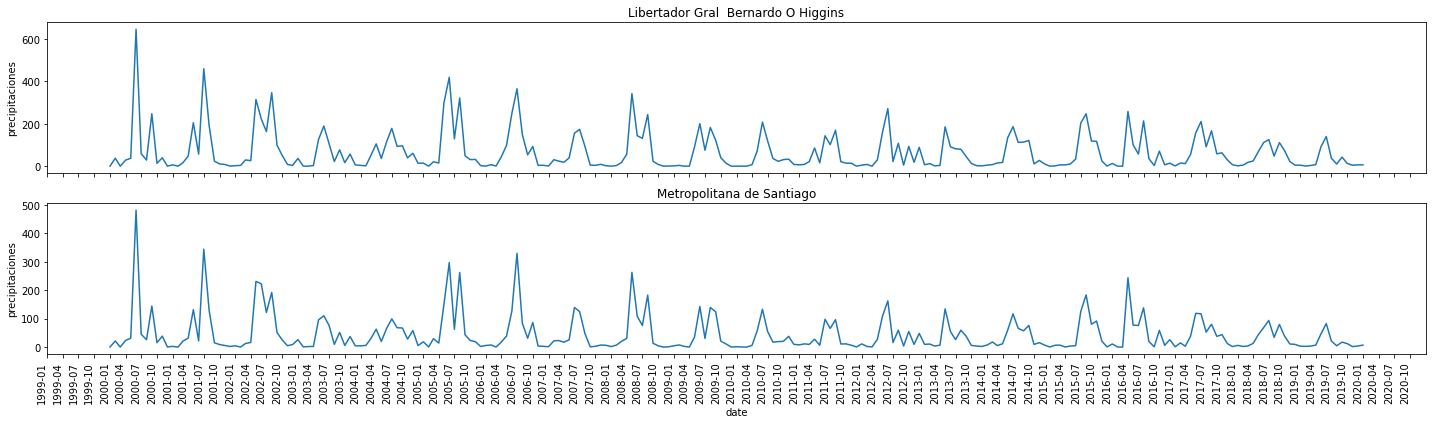

In [25]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,6))
ax = ax.flatten()

for i, region in enumerate(['Libertador_Gral__Bernardo_O_Higgins', 'Metropolitana_de_Santiago']):
    utils.plot_line_precipitaciones(precipitaciones_long, region=region, desde="2000-01-01", hasta="2020-01-01", ax=ax[i])
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate(rotation=90)
plt.tight_layout()

Podemos ver comportamientos similares entre las series donde:
- las precipitaciones suelen encontrar picos entre Junio/Julio y Octubre para luego tener épocas más secas durante el verano y otoño. (estacionalidad)
- no se ve una tendencia fuerte en ninguna dirección a nivel general pero sí una disminución paulatina de los picos máaximos a medida que pasan los años aunque parece más estable desde 2015 (tendencia)

Notar que las escalas son distintas y se ve que Santiago tiene picos con menor canitdad de precipitaciones

In [26]:
precipitaciones_long

,date,region,precipitaciones
0,1989-02-01,Coquimbo,0.719033
1,1998-10-01,Coquimbo,0.065216
2,2001-02-01,Coquimbo,2.030026
3,2008-11-01,Coquimbo,0.622784
4,2009-04-01,Coquimbo,0.008065
...,...,...,...
3963,1988-10-01,Los_Rios,181.879767
3964,2019-08-01,Los_Rios,233.621020
3965,2015-06-01,Los_Rios,386.836253
3966,2016-09-01,Los_Rios,119.114419


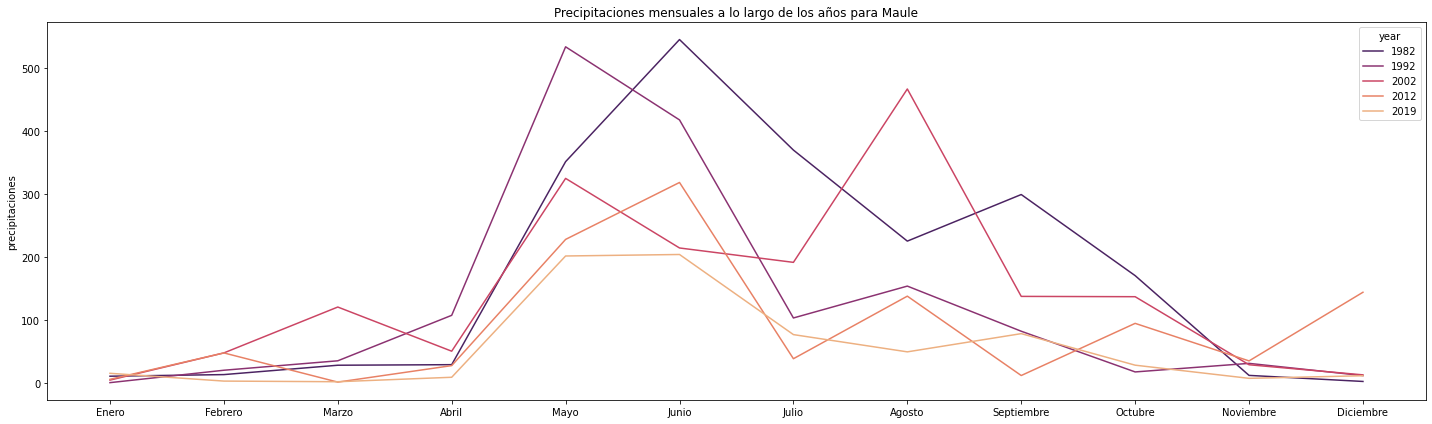

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

years = [1982,1992,2002,2012,2019]
utils.plot_precipitaciones_mensuales(precipitaciones_long, region="Maule", years=years, ax=ax)

plt.tight_layout();

A los largo de las últimas décadas el volumen de precipitaciones en Maule disminuyó notoriamente. Esto se ve marcadamenete de Abril a Octubre donde a pesar de haber variaciones está claro que las dos series más recientes tienden a estar por debajo del resto. En las épocas más secas es un poco menos claro este efecto pero el volumen de lluvia es mucho menor en ese lapso.

In [28]:
banco_central_long = pd.melt(filled_banco_central, id_vars="Periodo", var_name="variable", value_name="valor")


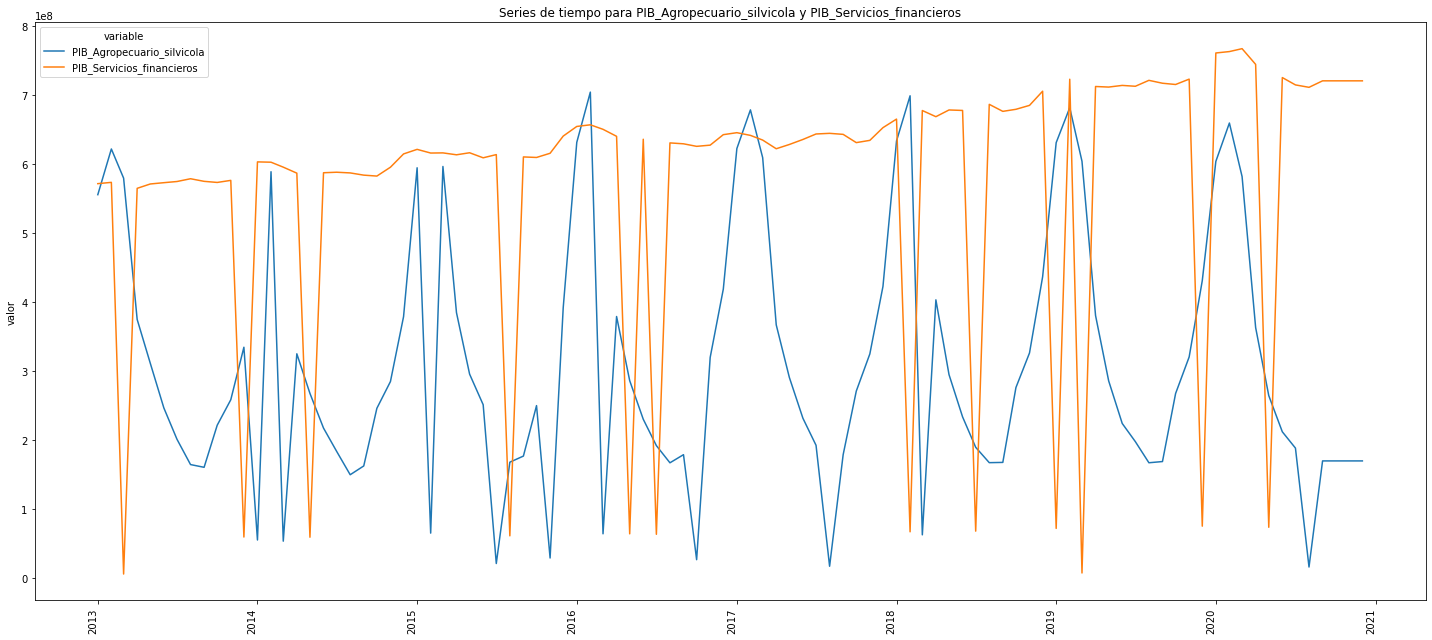

In [29]:

fig, ax = plt.subplots(1,1, figsize=(20,9))
utils.plot_pbi(banco_central_long, series=['PIB_Agropecuario_silvicola','PIB_Servicios_financieros'], desde="2013-01-01", hasta="2022-01-01", ax=ax)
fig.autofmt_xdate(rotation=90)
plt.tight_layout();

La serie de servicios financieros parece tener una tendencia alcista a los largo de los años pero resenta caídas fuertes puntuales con cierta recurrencia (podría llegar a ser problemas en los datos también.)  
La serie de PIB agropecuario-silvícola presenta una estacionalidad muy marcada con los picos más grandes en los primeros meses del año. No parece haber una tendencia clara pero los picos de los últimos años son mayores que los de 2013-2015.  
No se ve una relación clara entre las series.

### 4. Tratamiento y creación de variables

Al ser todas variables numéricas continuas uno puede calcular los coeficientes de correlación de a pares, siempre y cuando respeten el mismo ordenamiento de fechas.
Tanto Pearson como Spearman son válidas para este escenario, la primera mide correlación lineal mientras que la segunda mira correlación de ordenamiento y permite captar otro tipo de asociaciones.
El impacto depende del modelo seleccionado pero idealmente se busca baja correlación entre los predictores para facilitar el entrenamiento (problemas numéricos, de interpretación, etc), es decir,  no suma tener dos variables que proveen la misma información.  
Tener series con comportamientos distintos puede aportar de distintas maneras a la predicción de nuestra serie target.
Por otro lado, tener una serie que correlacione bien con nuestra serie target es siempre útil porque ya nos da mucha información acerca de lo que queremos predecir.

In [30]:
leche = pd.read_csv("precio_leche.csv")
leche.rename(columns={'Anio':'anio',
                       'Mes':'mes_abr'}, inplace=True)
leche['mes'] = leche['mes_abr'].apply(lambda x: np.select(
        condlist=[x=='Ene', x=='Feb', x=='Mar', x=='Abr', x=='May', x=='Jun', x=='Jul', x=='Ago', x=='Sep', x=='Oct', x=='Nov', x=='Dic'],
        choicelist= np.arange(1,13),
        default=None))
leche['trimestre'] = pd.to_datetime(leche.mes, format="%m").dt.quarter        
leche.head(10)


,anio,mes_abr,Precio_leche,mes,trimestre
0,1979,Ene,3.85,1,1
1,1979,Feb,4.58,2,1
2,1979,Mar,5.18,3,1
3,1979,Abr,6.06,4,2
4,1979,May,7.25,5,2
5,1979,Jun,7.71,6,2
6,1979,Jul,8.10,7,3
7,1979,Ago,7.65,8,3
8,1979,Sep,6.96,9,3
9,1979,Oct,5.79,10,4


In [31]:
# merge
df_full = leche.merge(precipitaciones, how='left', on=['anio','mes']).merge(filled_banco_central, how='left', on=['anio', 'mes'])
df_full.head()

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1979,Ene,3.85,1,1,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13672.0,22727.0,626.0,752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,Feb,4.58,2,1,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039,1979-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16713.0,24567.0,742.0,882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,Mar,5.18,3,1,1979-03-01,0.255490,0.020601,0.000000,0.05

In [32]:
# Correlacion
corr = df_full.corr()
corr_reduced = corr.reset_index().melt(id_vars="index", value_name='corr').query('corr < 1 and corr > -1').sort_values('corr')
corr_reduced['combined'] = corr_reduced['index'] + corr_reduced.variable
corr_reduced['combined_to_drop'] =  corr_reduced.apply(lambda x: "".join(sorted(list(x.combined))), axis=1)
corr_reduced = corr_reduced.drop_duplicates('combined_to_drop')
corr_reduced = corr_reduced[['index', 'variable', 'corr']]

In [33]:
corr_reduced

,index,variable,corr
660,No_sabe__No_responde_Miles_de_personas,Metropolitana_de_Santiago,-0.949799
8069,Valparaiso,No_sabe__No_responde_Miles_de_personas,-0.948845
8071,Libertador_Gral__Bernardo_O_Higgins,No_sabe__No_responde_Miles_de_personas,-0.901976
8072,Maule,No_sabe__No_responde_Miles_de_personas,-0.850002
8074,La_Araucania,No_sabe__No_responde_Miles_de_personas,-0.823791
...,...,...,...
874,La_Araucania,Biobio,0.970236
195,trimestre,mes,0.971780
96,anio,Precio_leche,0.973218
1066,La_Araucania,Los_Rios,0.974393


In [34]:
# Correlacion con target
corr_reduced.query('index == "Precio_leche" or variable=="Precio_leche"').sort_values('corr', ascending=False).head(10)

,index,variable,corr
96,anio,Precio_leche,0.973218
149,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_leche,0.789525
150,Precio_del_cobre_refinado_BML_dolareslibra,Precio_leche,0.788831
148,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_leche,0.691336
147,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_leche,0.689359
155,Precio_del_petroleo_WTI_dolaresbarril,Precio_leche,0.682343
153,Precio_del_petroleo_Brent_dolaresbarril,Precio_leche,0.345627
172,Ocupacion_en_Suministro_de_agua_evacuacion_de_...,Precio_leche,0.302290
154,Precio_del_kerosene_dolaresm3,Precio_leche,0.299692
157,Tipo_de_cambio_del_dolar_observado_diario,Precio_leche,0.276020


In [35]:
corr_reduced.query('index == "Precio_leche" or variable=="Precio_leche"').sort_values('corr', ascending=True).head(10)

,index,variable,corr
178,Ocupacion_en_Actividades_de_los_hogares_como_e...,Precio_leche,-0.385449
125,PIB_Textil,Precio_leche,-0.378096
114,Imacec_servicios,Precio_leche,-0.338036
1825,Precio_leche,Imacec_a_costo_de_factores,-0.333523
179,Ocupacion_en_Actividades_de_organizaciones_y_o...,Precio_leche,-0.321769
1345,Precio_leche,Imacec_minero,-0.318458
159,Ocupacion_en_Agricultura_INE,Precio_leche,-0.313755
5761,Precio_leche,Precio_del_propano_centavos_de_dolargalon_DTN,-0.309783
2209,Precio_leche,PIB_Mineria,-0.272881
1153,Precio_leche,Imacec_empalmado,-0.269934


<AxesSubplot:>

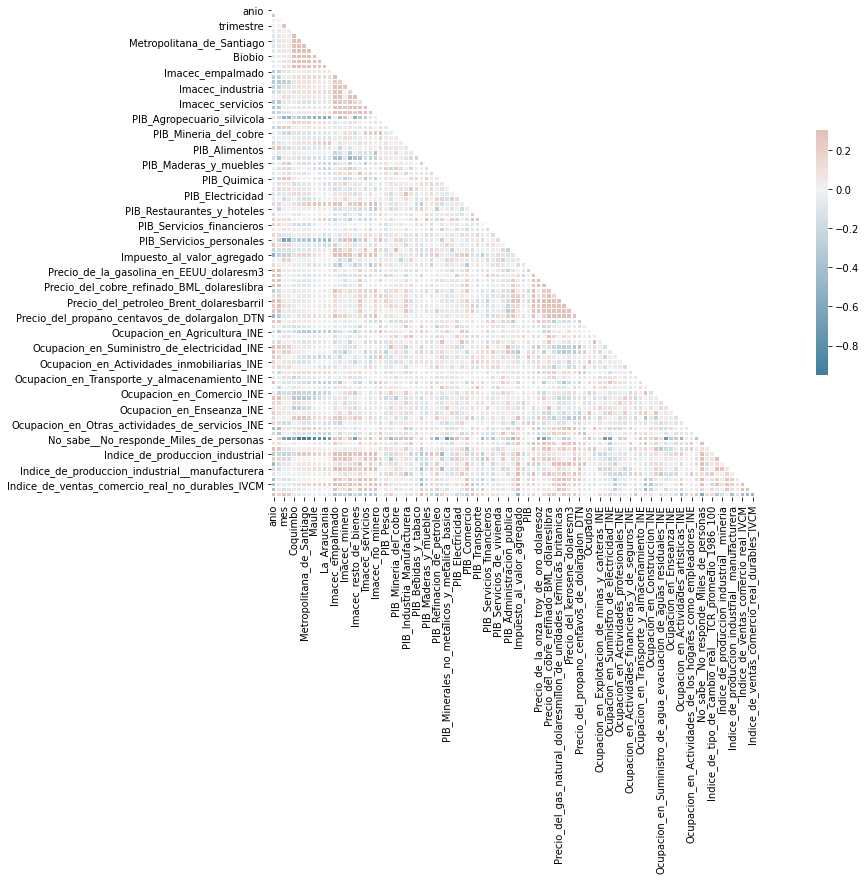

In [36]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

No es una visualización detallada por la alta cantidad de variables pero a nivel grupo se puede observar que las variables de ciertos grupos como Precipitaciones,  Imacec, Precios y los indices correlacionan positivamente entre sí, al interior de cada grupo. Es decir que cada grupo presenta movimientos más o menos similares entre sus series.  
Por otra parte los PIB y ocupacion son mas disímiles. Puede deberse a la independencia de alguna manera entre sectores y estacionalidades.

#### Generación de variables

In [37]:
def mean_rating_window(df, var, window, min_periods):
    """ Calculates simple moving average over desired windows  
     Shift() to not use current record.
    """
    new_feature = df.sort_values('date')[var].rolling(
        window, min_periods=min_periods)\
        .mean()\
        .reset_index(level=0)[var]
    return new_feature



def exponential_cumulative_mean(df,  var, alpha):
    """ Calculates exponential average. 
     Shift() to not use current record. """
    new_feature = df.sort_values('date')[var]\
        .ewm(alpha=alpha)\
        .mean()\
        .reset_index(level=0)[var]
    return new_feature


In [38]:
# medias móviles
for i in range(1,10,3):
    df_full["mean_price_" + str(i)] = mean_rating_window(df_full,  'Precio_leche', i, 1)

In [39]:
# Exponential average
df_full['exp_cumulative_mean'] = exponential_cumulative_mean(df_full, 'Precio_leche', 0.9)

Generamos variables de medias móviles de distintos períodos y una versión de media exponencial (que le da más peso a las observaciones recientes).  
Las variables de año, mes y trimestre se generaron en el primer paso de esta sección.

### 5. Modelo


Vamos a modelar el precio de la leche basados en los datos que tenemos y algunas variables generadas. Lo importante es no cometer data leakage y utilizar información que no tendríamos ante un nuevo período a predecir. Para ellos vamos a shiftear la variable dependiente y las variables de fecha (años, mes, trimestre) ya que son identificadores que se saben a la hora de predecir el próximo mes, no así el resto de las variables como precios, PIB, etc que solo tenemos hasta el último valor anterior.  
Hay varios enfoques posibles pero vamos a ir por una regresión regularizada para tener capacidad de extrapolación y no preocuparnos tanto por las correlaciones manteniendo algo simple. Por hacerlo  sin investigar interacciones nos perdemos esos efectos que con otro tipo de modelos basados en árboles - por ej. Random Forest, Xgboost - podríamos tener sin mucho problema.   
Necesitamos datos sin NaN lo cual solo tenemos entre 2014 y Novimebre 2020 si usamos todo. Vamos a elegir un subset de variables pero podemos quedarnos con esa franja para asegurarnos no tener problemas por ese motivo y dado que es una serie de tiempo es razonable pensar que la distribución más reciente de los datos revele más información del futuro cercano que la relación que había décadas hacia atrás.

Dado el período elegido, vemos que de 2014 a fin de 2018 hay cerca del 70% de los datos. Dado que no vamos a optimizar hiperparámetros en este caso podemos hacer un corte 70-30 y que test sea a partir de 2019.

Lo importante acá es mantener el ordenamiento temporal dado que queremos predecir el próximo valor. No se puede mezclar los datos.
Otra alternativa posible es hacer crossvalidation donde se toma parte de la data para entrenar y una porcion posterior para validar y nos vamos moviendo asi a lo largo del rango de fechas, siempre prediciendo una o más observaciones posteriores. Si usaramos toda la data y no solo este período acotado por ahí tendría sentido.

Para las variables, elegimos las creadas en el paso anterior y algunas de las más correlacionadas con el target pero mirando solo el periodo 2014-2018

Text(0.5, 1.0, 'Precio nominal de la leche, sin iva, en pesos chilenos por litro')

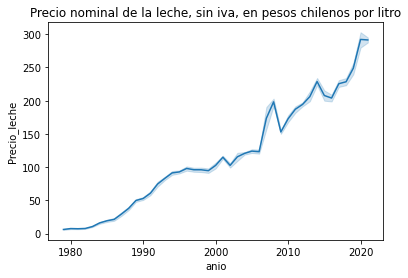

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.lineplot(data=leche, x="anio", y='Precio_leche')
ax.set_title("Precio nominal de la leche, sin iva, en pesos chilenos por litro")

In [41]:
# Dataest para modelar
columnas = ['Precio_leche','anio', 'mes', 'trimestre'] + list(df_full.columns[df_full.columns.str.startswith("mean")].values) +  list(df_full.columns[df_full.columns.str.startswith("exp_")].values) + ['Generacion_de_energia_electrica_CDEC_GWh', "Imacec_empalmado", "Precio_de_la_onza_troy_de_oro_dolaresoz" ]

df_model = df_full.loc[:, columnas]
df_model['trend'] = np.arange(0, df_model.shape[0]) 
df_model[['Precio_leche', 'anio', 'mes', 'trimestre']] = df_model[['Precio_leche', 'anio', 'mes', 'trimestre']].shift(-1)


In [42]:
df_model.sort_values(['anio', 'mes'], ascending=False).head()

,Precio_leche,anio,mes,trimestre,mean_price_1,mean_price_4,mean_price_7,exp_cumulative_mean,Generacion_de_energia_electrica_CDEC_GWh,Imacec_empalmado,Precio_de_la_onza_troy_de_oro_dolaresoz,trend
504,295.24,2021.0,2.0,1.0,287.60,284.3250,291.290000,287.564006,NaN,NaN,NaN,504
503,287.60,2021.0,1.0,1.0,287.29,282.1725,295.312857,287.240056,64369.0,108402879.0,186635.0,503
502,287.29,2020.0,12.0,4.0,288.09,287.7100,299.825714,286.790563,64369.0,108402879.0,186635.0,502
501,288.09,2020.0,11.0,4.0,274.32,294.0125,303.848571,275.095631,64369.0,108402879.0,190036.0,501
500,274.32,2020.0,10.0,4.0,278.99,304.3725,304.642857,282.076308,61631.0,103201091.0,192335.0,500


In [43]:
train_init = 2014
val_init = 2019

train = df_model.loc[(df_model.anio >= train_init) & (df_model.anio < val_init),:].dropna()
val = df_model.loc[(df_model.anio >= val_init) & (df_model.anio < 2021),:].dropna()
# assert train.shape[0] + val.shape[0] == df_model.shape[0]

In [44]:
val.tail().sort_values('mes', ascending=False)

,Precio_leche,anio,mes,trimestre,mean_price_1,mean_price_4,mean_price_7,exp_cumulative_mean,Generacion_de_energia_electrica_CDEC_GWh,Imacec_empalmado,Precio_de_la_onza_troy_de_oro_dolaresoz,trend
502,287.29,2020.0,12.0,4.0,288.09,287.7100,299.825714,286.790563,64369.0,108402879.0,186635.0,502
501,288.09,2020.0,11.0,4.0,274.32,294.0125,303.848571,275.095631,64369.0,108402879.0,190036.0,501
500,274.32,2020.0,10.0,4.0,278.99,304.3725,304.642857,282.076308,61631.0,103201091.0,192335.0,500
499,278.99,2020.0,9.0,3.0,309.44,314.3450,303.380000,309.853082,6452.0,101314552.0,196978.0,499
498,309.44,2020.0,8.0,3.0,313.30,316.0475,295.474286,313.570820,64777.0,966693225.0,184637.0,498


In [45]:
# Separamos target y generamos datasets para sklearn
y = train['Precio_leche']
X = train.drop(columns='Precio_leche')
assert X.shape[0] == len(y)
y_val = val['Precio_leche']
X_val = val.drop(columns="Precio_leche")

In [46]:
# Generamos pipeline para asegurarnos las mismas trnasformaciones sin data leakage entre train y test. Facilitador si eventualmente se agregaran más pasos
pipe = Pipeline([
    ('scaler', StandardScaler(with_std=False)),
    ('model', Lasso())
])

In [47]:
# entrenamos
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(with_std=False)), ('model', Lasso())])

In [48]:
# Métricas en train
print(f' RMSE: {round(math.sqrt(mean_squared_error(y, pipe.predict(X))),3)}')
print(f' MAPE: {round(mean_absolute_percentage_error(y, pipe.predict(X )),3)}')
print(f' MAE : {round(mean_absolute_error(y, pipe.predict(X )),3)}')

 RMSE: 4.756
 MAPE: 0.016
 MAE : 3.561


In [49]:
# Métricas en test
print(f' RMSE: {round(math.sqrt(mean_squared_error(y_val, pipe.predict(X_val))),3)}')
print(f' MAPE: {round(mean_absolute_percentage_error(y_val, pipe.predict(X_val )),3)}')
print(f' MAE : {round(mean_absolute_error(y_val, pipe.predict(X_val )),3)}')

 RMSE: 13.127
 MAPE: 0.038
 MAE : 10.304


<AxesSubplot:xlabel='x'>

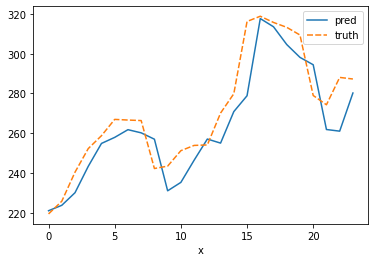

In [50]:
df = pd.DataFrame({
    'x': range(0,len(y_val)),
    'pred': pipe.predict(X_val),
                    'truth': y_val})
sns.lineplot(data=df.set_index("x"))

#### Métrica
Según lo que busquemos responder o el uso del modelo, la evaluación va a ser distinta. Aqui vamos a evaluar simplemente el poder predictivo del modelo.
Nos encontramos en un problema de regresión y por lo tanto hay varias métricas que pueden mirarse como  MAPE, RMSE, MAE.  
La idea de fondo es ver que tan lejos está nuestra predicción del valor real, ya sea utilizando el cuadrado o valores absolutos para evitar que se compensen residuos positivos y negativos. Considero el MAPE una medida bastante intuitiva ya que no depende de la escala ni se ve afectada por la evolución de la variable dependiente (precio que sube) y devuelve el porcentaje de error promedio. En nuestro caso vemos que en test el MAPE es de 3.8%, es decir que nuestras predicciones en promedio se desvía en ese porcentaje. También se puede leer el MAE en ese sentido, en promedio nos desvíamos poco más de 10 pesos chilenos.

Por otra parte vemos que nuestras métricas se degradan bastante respecto a train por lo que quizás estemos cometiendo un poco de overfitting o la relación entre variables cambie un poco en la última étapa. Podría pasarse a un esquema de train-val-test para optimizar parámetros de Lasso y usar test para evaluar performance al final. En cualquier caso no parece una mala predicción con algo no tan sofisticado.



#### Datos adicionales
Podría servir:  
* el dato de importación, producción mundial y producción local de leche por período
* el precio internacional de la leche o algun proxy
* indice de inflación


#### Aplicaciones

Un modelo de este tipo puede servir desde el aspecto financiero de hogares/organizaciones para elegir dentro de lo posible el mejor momento de compra del producto (stockeo ahora que el precio será menor que el mes que viene o espero dado que bajará?). El ahorro generado por el modelo puede destinarse a otros productos/areas dependiendo de quien use el modelo optimizando el presupuesto.  Con respecto al cambio climático, el dinero ahorrado puede destinarse a mitigar la contaminación y/o invertir en procesos menos dañinos.  
Más en general modelos predictivos de este estilo pueden ayudar a la toma de decisiones respecto a la producción y utilización de recursos en determinado momento de manera tal de disminuir la contaminación. Por ejemplo si algún proceso depende de los vientos o lluvias y uno puede aproximar su próxima medición puede optimizar el uso de los productos para sacarle el mayor provecho (o no preparar nada si supone que no habrá suficiente cantidad.)


In [51]:
print(f' Last update: {datetime.datetime.now()}')

 Last update: 2021-08-01 19:56:59.350997
